In [625]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import re

# download list of stopwords from nltk lib.
stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')


from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import pairwise_distances

from scipy.sparse import hstack


pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to /home/karol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [626]:
def convert_to_string(row, column):
    if isinstance(row[column], list):
        # If the value is a list, join the strings using a comma
        subject_key_str = ' '.join(row[column])
    else:
        # If the value is a string, just return the string itself
        subject_key_str = row[column]
    return subject_key_str


def nlp_preprocessing(total_text, index, column, dataframe):
    if type(total_text) is str:
        string = ""
        for words in total_text.split():
            # remove the special chars like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Convert all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        dataframe[column][index] = string
    else:
        dataframe[column][index] = ""
        
        

def contains(sublist, item):
    for l in sublist:
        if re.search(r".*{}.*".format(item.lower()), l.lower()):
            return True
    return False
        
    
    
all_names = {
        'iran': ['iran', 'persia', 'persepolis', 'pasargad', 'elam', 'media'],
        'iraq': ['iraq', 'mesopotamia', 'sumer', 'akkad', 'babylon', 'assyr', 'parthi', 'sassanian'],
        'united kingdom': ['england','ireland', 'scotland', 'wales', 'london'],
        'pakistan': ['pakistan', 'indus', 'mohendsch', 'mohenj'],
        'greece': ['greece', 'achaea', 'aeolis', 'arcadia', 'boeotia', 'chalcidice', 'crete', 'cyprus', 'cyzicus', 'delphi', 'dodona', 'euboea', 'epirus', 'etolia', 'heracleia', 'ionia', 'laconia', 'lesbos', 'lydia', 'macedonia', 'megaris', 'messinia', 'mycenae', 'olbia', 'peloponnese', 'phocis', 'phoenicia', 'thebes', 'thessaly', 'crete'],
        'albania': ['albania', 'dardania', 'ancient epirus'],
        'algeria': ['algeria', 'numidia', 'roman province of mauretania'],
        'angola': ['angola', 'kingdom of kongo'],
        'armenia': ['armenia', 'urartu', 'arsacid empire'],
        'austria': ['austria', 'ostmark', 'roman province of noricum'],
        'belarus': ['belarus', 'white rus', 'slavic settlements'],
        'belgium': ['belgium', 'belgium', 'roman province of gallia belgica', 'habsburg netherlands'],
        'bosnia and herzegovina': ['bosnia and herzegovina', 'bosna', 'hum'],
        'bulgaria': ['bulgaria', 'thrace', 'odysian kingdom'],
        'croatia': ['croatia', 'panonia', 'illyria'],
        'cyprus': ['cyprus', 'cypriot civilization', 'minoan settlements'],
        'czechia': ['czech republic', 'czech lands', 'great moravian empire', 'bohemian kingdom'],
        'denmark': ['denmark', 'denmark', 'vikings', 'viking age'],
        'finland': ['finland', 'finland', 'samoyede'],
        'france': ['france', 'gaul', 'celtic tribes', 'roman province of gaul'],
        'georgia': ['georgia', 'iberia', 'colchis'],
        'germany': ['germany', 'teutonic tribes', 'holy roman empire'], 
        'hungary': ['hungary', 'hungary', 'avar khaganate'],
        'iceland': ['iceland', 'norse settlers', 'viking age'],
        'ireland': ['ireland', 'ireland', 'celtic tribes'],
        'italy': ['italy', 'latium', 'etruria', 'ausonia', 'enotria', 'roma', 'rome'],
        'kazakhstan': ['kazakhstan', 'saka tribes', 'khazar khanate'],
        'kosovo': ['kosovo', 'kosovo', 'serbian empire'],
        'latvia': ['latvia', 'latvia', 'baltic tribes'],
        'lithuania': ['lithuania', 'lithuania', 'baltic tribes'],
        'luxembourg': ['luxembourg', 'grand duchy of luxembourg'],
        'macedonia': ['macedonia', 'aegae', 'eordaia', 'upper macedonia', 'chalcidice'],
        'north macedonia': ['macedonia', 'aegae', 'eordaia', 'upper macedonia', 'chalcidice'],
        'moldova': ['moldova', 'dacia', 'roman province of dacia'],
        'morocco': ['morocco', 'berber kingdoms'],
        'netherlands': ['netherlands', 'low countries', 'frankish empire', 'dutch republic'],
        'poland': ['poland', 'vistula river trade routes', 'polish-lithuanian commonwealth'],
        'portugal': ['portugal', 'lusitanian tribes', 'roman province of lusitania'],
        'romania': ['romania', 'romania', 'dacia', 'roman province of dacia'],
        'russia': ['russia', 'scythia', 'sarmatians', 'khazar khanate'],
        'serbia': ['serbia', 'serbia', 'serbian empire'],
        'slovakia': ['slovakia', 'slovak lands', 'principality of nitra', 'great moravian empire'],
        'slovenia': ['slovenia', 'slovenian lands', 'slovenia'],
        'spain': ['spain', 'hispania', 'iberian peninsula', 'tartessian civilization', 'numidians', 'roman province of hispanial'],
        'switzerland': ['switzerland', 'helvetian confederacy', 'roman province of helvetia'],
        'turkey': ['turkey', 'anatolia', 'hittite empire', 'hattu', 'phrygian kingdom', 'phrygia', 'ancient greek colonies'],
        'ukraine': ['ukraine', 'kievan rus']
        }


for k,i in all_names.items():
    all_names.update({k:' '.join(all_names[k])})
    
    
def collapse_column(column):
    return 1 if any(column) else 0

In [627]:
#read full book list and process subject_key text column

df = pd.read_json('data/downloaded.json')


# Apply convert_to_string function to each row of the 'subject_key' column
df['subject_key'] = df.apply(convert_to_string, args=('subject_key',), axis=1)
df['place_key'] = df.apply(convert_to_string, args=('place_key',), axis=1)
df['person_key'] = df.apply(convert_to_string, args=('person_key',), axis=1)

for index, row in df.iterrows():
    nlp_preprocessing(row['subject_key'], index, 'subject_key',df)
for index, row in df.iterrows():
    nlp_preprocessing(row['place_key'], index, 'place_key',df)
for index, row in df.iterrows():
    nlp_preprocessing(row['person_key'], index, 'person_key',df)
    
df=df.reset_index(drop=True)

df.iloc[[208]]

,title,author_name,first_publish_year,last_publish_year,place,place_key,subject,subject_key,person,person_key,language,isbn,key,url
208,Persians,Lloyd Llewellyn-Jones,2022,2022,"[Babylon, Egypt, Pasargadae, Persepolis]",babylon egypt pasargadae persepolis,"[Persia, ancient history, Asian / Middle Eastern history]",ancienthistory asianmiddleeasternhistory persia,"[Alexander, Artaxerxes, Cambyses, Cyrus, Darius, Herodotus, Xerxes]",alexander artaxerxes cambyses cyrus darius herodotus xerxes,[eng],9781541604230,/works/OL25338087W,https://openlibrary.org/works/OL25338087W


In [628]:
#df[df['person'].fillna('').apply(contains, item='alexa')]


In [629]:
#all_subjects=''
#for i in df['subject_key']:
#    all_subjects+=i

In [630]:
#read selected favorie book list and process subject_key text column

df_fav = pd.read_csv('data/my_favs.csv')
df_fav= df_fav.set_index('Unnamed: 0')
df_fav.index.name = None

#fav_subjects=''
#for i in df_fav['subject_key']:
#    fav_subjects+=i
 #print(fav_subjects)   
    
df_fav["subject_key"] = df_fav["subject_key"].str.replace(","," ")
df_fav["place_key"] = df_fav["place_key"].str.replace(","," ")
df_fav["person_key"] = df_fav["person_key"].str.replace(","," ")

for index, row in df_fav.iterrows():
    nlp_preprocessing(row['subject_key'], index, 'subject_key',df_fav)
for index, row in df_fav.iterrows():
    nlp_preprocessing(row['place_key'], index, 'place_key',df_fav)
for index, row in df_fav.iterrows():
    nlp_preprocessing(row['person_key'], index, 'person_key',df_fav)
    
    
df_fav.head(1)
    




,title,author_name,first_publish_year,last_publish_year,place,place_key,subject,subject_key,person,person_key,language,isbn,key,url,favorite
208,Persians,Lloyd Llewellyn-Jones,2022,2022,"Babylon,Egypt,Pasargadae,Persepolis",babylon egypt pasargadae persepolis,"Persia,ancient history,Asian / Middle Eastern history",ancienthistory asianmiddleeasternhistory persia,"Alexander,Artaxerxes,Cambyses,Cyrus,Darius,Herodotus,Xerxes",alexander artaxerxes cambyses cyrus darius herodotus xerxes,eng,9781541604230,/works/OL25338087W,https://openlibrary.org/works/OL25338087W,True


In [631]:

df.iloc[[208]]

,title,author_name,first_publish_year,last_publish_year,place,place_key,subject,subject_key,person,person_key,language,isbn,key,url
208,Persians,Lloyd Llewellyn-Jones,2022,2022,"[Babylon, Egypt, Pasargadae, Persepolis]",babylon egypt pasargadae persepolis,"[Persia, ancient history, Asian / Middle Eastern history]",ancienthistory asianmiddleeasternhistory persia,"[Alexander, Artaxerxes, Cambyses, Cyrus, Darius, Herodotus, Xerxes]",alexander artaxerxes cambyses cyrus darius herodotus xerxes,[eng],9781541604230,/works/OL25338087W,https://openlibrary.org/works/OL25338087W


In [632]:
df=df[~df.index.isin(df_fav.index)]

In [633]:

df.iloc[[208]]

,title,author_name,first_publish_year,last_publish_year,place,place_key,subject,subject_key,person,person_key,language,isbn,key,url
209,Time in Antiquity,Robert Hannah,2000,2009,None,,"[Ancient Civilization, History, Social aspects of Time, Time, Time measurements, Classical Civilization, Temps, Histoire, Aspect social, Mesure, Civilisation ancienne, SCIENCE, Social aspects]",ancientcivilization aspectsocial civilisationancienne classicalcivilization histoire history mesure science socialaspects socialaspectsoftime temps time timemeasurements,None,,[eng],1134323131,/works/OL8371761W,https://openlibrary.org/works/OL8371761W


In [634]:
df['place_key']

0                       greece 
1                              
2       greece rome romeempire 
3                              
4                       russia 
                 ...           
4896                     texas 
4897                           
4898                           
4899                           
4900                           
Name: place_key, Length: 4899, dtype: object

In [635]:
df['place_key']=df['place_key'].replace(all_names, regex=True)

In [636]:
df['place_key']

0                       greece achaea aeolis arcadia boeotia chalcidice crete cyprus cyzicus delphi dodona euboea epirus etolia heracleia ionia laconia lesbos lydia macedonia megaris messinia mycenae olbia peloponnese phocis phoenicia thebes thessaly crete 
1                                                                                                                                                                                                                                                                
2       greece achaea aeolis arcadia boeotia chalcidice crete cyprus cyzicus delphi dodona euboea epirus etolia heracleia ionia laconia lesbos lydia macedonia megaris messinia mycenae olbia peloponnese phocis phoenicia thebes thessaly crete rome romeempire 
3                                                                                                                                                                                                                                 

In [637]:
df_fav['place_key']

208    babylon egypt pasargadae persepolis 
866                                   iraq 
Name: place_key, dtype: object

In [638]:
df_fav['place_key']=df_fav['place_key'].replace(all_names, regex=True)

In [639]:
df_fav['place_key']

208                            babylon egypt pasargadae persepolis 
866    iraq mesopotamia sumer akkad babylon assyr parthi sassanian 
Name: place_key, dtype: object

# Create Bag of Words

In [640]:
subject_key_vectorizer = CountVectorizer()
subject_key_features   = subject_key_vectorizer.fit_transform(df['subject_key'])
print( subject_key_features.get_shape() ) 

place_key_vectorizer = CountVectorizer()
place_key_features   = place_key_vectorizer.fit_transform(df['place_key'])
print( place_key_features.get_shape() ) 

person_key_vectorizer = CountVectorizer()
person_key_features   = person_key_vectorizer.fit_transform(df['person_key'])
print( person_key_features.get_shape() )

all_features_df = hstack((subject_key_features, place_key_features,person_key_features)).tocsr()
print(all_features_df.get_shape() )

(4899, 9872)
(4899, 624)
(4899, 401)
(4899, 10897)


## create a matrix from df_fav and combine all rows together

In [641]:
subject_key_features   = subject_key_vectorizer.transform(df_fav['subject_key'])
print( subject_key_features.get_shape() ) 

place_key_features   = place_key_vectorizer.transform(df_fav['place_key'])
print( place_key_features.get_shape() ) 

person_key_features   = person_key_vectorizer.transform(df_fav['person_key'])
print( person_key_features.get_shape() )

all_features_df_fav = hstack((subject_key_features, place_key_features,person_key_features)).tocsr()
print(all_features_df_fav.get_shape() )

(2, 9872)
(2, 624)
(2, 401)
(2, 10897)


In [642]:
all_features_df_fav.nonzero()

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1], dtype=int32),
 array([  373,   896,  9945, 10053, 10319, 10683,   410,   524,  1103,
         1879,  4202,  4370,  4824,  5973,  8558,  8567,  9887,  9929,
         9945, 10144, 10241, 10313, 10369, 10407], dtype=int32))

In [643]:

# Collapse each column into a matrix of a single row
collapsed_matrix = np.array([[collapse_column(i) for i in all_features_df_fav.toarray().T]])

print(collapsed_matrix[:,371:376])


[[0 0 1 0 0]]


In [644]:
df[df.index.isin(df_fav.index)].index

Index([], dtype='int64')

## Make recommendations

In [645]:

selection = collapsed_matrix
num_results = 10
pairwise_dist = pairwise_distances(all_features_df,selection)

# np.argsort will return indices of the smallest distances
indices = np.argsort(pairwise_dist.flatten())[0:num_results]

df_indices = list(df.index[indices])



df.loc[df_indices]




,title,author_name,first_publish_year,last_publish_year,place,place_key,subject,subject_key,person,person_key,language,isbn,key,url
3197,From Mesopotamia to Iraq,Hans Jörg Nissen,2009,2009,[Iraq],iraq mesopotamia sumer akkad babylon assyr parthi sassanian,"[Civilization, History, Historia, Ancient History, Iraq, history, to 634, Iran, civilization]",ancienthistory civilization historia history irancivilization iraqhistoryto634,None,,[eng],9780226586632,/works/OL784385W,https://openlibrary.org/works/OL784385W
2213,Iraq,Michael Wood,2002,2002,"[Iraq, India]",india iraq mesopotamia sumer akkad babylon assyr parthi sassanian,"[Ancient Civilization, History, Civilization]",ancientcivilization civilization history,None,,[eng],A,/works/OL34727429W,https://openlibrary.org/works/OL34727429W
1560,Mesopotamia,Gwendolyn Leick,2001,2002,[Iraq],iraq mesopotamia sumer akkad babylon assyr parthi sassanian,"[Civilization, Ancient Cities and towns, Iraq, history, to 634, Asia, history, Iraq, antiquities, History]",ancientcitiesandtowns asiahistory civilization history iraqantiquities iraqhistoryto634,None,,"[eng, spa]",9780140265743,/works/OL3961855W,https://openlibrary.org/works/OL3961855W
1828,Engraved on Stone,Rony Feingold,2014,2014,[Iraq],iraq mesopotamia sumer akkad babylon assyr parthi sassanian,"[Cylinder seals, Antiquities, History, Cuneiform inscriptions, History, ancient]",antiquities cuneiforminscriptions cylinderseals history historyancient,None,,[eng],9781463201678,/works/OL20955055W,https://openlibrary.org/works/OL20955055W
2769,Mesopotamian sculpture in colour,N,2020,2020,[Iraq],iraq mesopotamia sumer akkad babylon assyr parthi sassanian,"[Polychromy, History, Antiquities, Ancient Sculpture, Aesthetics]",aesthetics ancientsculpture antiquities history polychromy,None,,[eng],393501242X,/works/OL32309789W,https://openlibrary.org/works/OL32309789W
3244,Mesopotamian medicine and magic,Markham J. Geller,2018,2018,[Iraq],iraq mesopotamia sumer akkad babylon assyr parthi sassanian,"[Medicine, Assyro-Babylonian, Ancient Medicine, Cuneiform tablets, History]",ancientmedicine cuneiformtablets history medicineassyrobabylonian,None,,[eng],9789004368064,/works/OL32471087W,https://openlibrary.org/works/OL32471087W
1293,Rituals of war,Zainab Bahrani,2008,2008,[Iraq],iraq mesopotamia sumer akkad babylon assyr parthi sassanian,"[Ancient History, Ancient Military history, History, History, Ancient, Military history, Ancient, War]",ancienthistory ancientmilitaryhistory history historyancient militaryhistoryancient war,None,,[eng],9781890951849,/works/OL12292502W,https://openlibrary.org/works/OL12292502W
1832,Mathematics in ancient Iraq,Eleanor Robson,2008,2008,[Iraq],iraq mesopotamia sumer akkad babylon assyr parthi sassanian,"[History, Mathematics, Ancient Mathematics, Mathematics, history, Education, iraq]",ancientmathematics educationiraq history mathematics mathematicshistory,None,,[eng],0691201404,/works/OL1956129W,https://openlibrary.org/works/OL1956129W
3150,Models of Mesopotamian landscapes,"Wilkinson, T. J.",2013,2013,[Iraq],iraq mesopotamia sumer akkad babylon assyr parthi sassanian,"[Civilization, Human settlements, History, Ancient Civilization, Computer simulation, Civilization, ancient, Iraq, social life and customs]",ancientcivilization civilization civilizationancient computersimulation history humansettlements iraqsociallifeandcustoms,None,,[eng],1407311735,/works/OL23153475W,https://openlibrary.org/works/OL23153475W
3821,Mesopotamian furniture,Shamil A. A. Kubba,2006,2006,"[Iraq, Mesopotamia]",iraq mesopotamia sumer akkad babylon assyr parthi sassanian mesopotamia,"[Ancient Furniture, Antiquities, Civilization, Civilization, Assyro-Babylonian, Furniture, Ancient, Mesolithic period, Furniture, Civilization, assyro-babylonian, Iraq, antiquities, Iraq, history, to 634]",ancientfurniture antiquities civilization civilizationassyrobabylonian furniture furnitureancient iraqantiquities iraqhistoryto634 mesolithicperiod,None,,[eng],1841

In [646]:
df_rec = df.loc[df_indices]

In [681]:
df_rec['isbn']

df_rec['image_link']='https://covers.openlibrary.org/b/isbn/'+df_rec['isbn']+'-M.jpg'

In [682]:
df_rec['image_link']

3197    https://covers.openlibrary.org/b/isbn/9780226586632-M.jpg
2213                https://covers.openlibrary.org/b/isbn/A-M.jpg
1560    https://covers.openlibrary.org/b/isbn/9780140265743-M.jpg
1828    https://covers.openlibrary.org/b/isbn/9781463201678-M.jpg
2769       https://covers.openlibrary.org/b/isbn/393501242X-M.jpg
3244    https://covers.openlibrary.org/b/isbn/9789004368064-M.jpg
1293    https://covers.openlibrary.org/b/isbn/9781890951849-M.jpg
1832       https://covers.openlibrary.org/b/isbn/0691201404-M.jpg
3150       https://covers.openlibrary.org/b/isbn/1407311735-M.jpg
3821       https://covers.openlibrary.org/b/isbn/1841717649-M.jpg
Name: image_link, dtype: object

In [670]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt



In [678]:
img = requests.get(df_rec['image_link'])
image=Image.open(BytesIO(img.content))

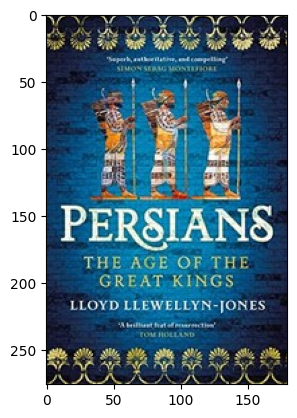

In [679]:
plt.imshow(image)

## Simple example

In [ ]:
train_df = pd.DataFrame({'names': ['ala', 'bert', 'ala bert', '', 'ala bert caesar', 'ala caesar']})
train_df

,names
0,ala
1,bert
2,ala bert
3,
4,ala bert caesar
5,ala caesar


In [ ]:
train_vectorizer = CountVectorizer()
train_features   = train_vectorizer.fit_transform(train_df['names'])
train_features.get_shape()


(6, 3)

In [ ]:
train_features.todense()

matrix([[1, 0, 0],
        [0, 1, 0],
        [1, 1, 0],
        [0, 0, 0],
        [1, 1, 1],
        [1, 0, 1]])

In [ ]:
test_df = pd.DataFrame({'names': ['ala caesar']})
test_df

,names
0,ala caesar


In [ ]:
test_features   = train_vectorizer.transform(test_df['names'])
test_features.get_shape()


(1, 3)

In [ ]:
test_features.toarray()

array([[1, 0, 1]])

In [ ]:
pairwise_dist = pairwise_distances(train_features,test_features)
pairwise_dist

array([[1.        ],
       [1.73205081],
       [1.41421356],
       [1.41421356],
       [1.        ],
       [0.        ]])

In [ ]:
num_results=4

# np.argsort will return indices of the smallest distances
indices = np.argsort(pairwise_dist.flatten())[0:num_results]
indices


array([5, 0, 4, 2])